## 1. Exploración de Datos (EDA) y Limpieza de Datos

**Objetivo**: Familiarizarse con la estructura, características y posibles problemas de los datasets, además de limpiar los datos si es necesario.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Cargar los datasets
df_demo = pd.read_csv('df_final_demo.txt', delimiter=',')  # Usa el delimitador adecuado
df_web_pt1 = pd.read_csv('df_final_web_data_pt_1.txt', delimiter=',')
df_web_pt2 = pd.read_csv('df_final_web_data_pt_2.txt', delimiter=',')
df_experiment = pd.read_csv('df_final_experiment_clients.txt', delimiter=',')



Creamos una función para la primera exploracion de los datos.

In [4]:
# Función para exploración de los datos
def df_exploration(df):
    # Revisión básica de los datos
    print(df.info())  # Para revisar los tipos de datos
    print(f"\nValores duplicados: {df.duplicated().sum()}")  # Revisa si hay duplicados en los datasets
    print(f"\nValores nulos: \n{df.isnull().sum()}") # Revisar valores nulos
    print (f"\nValores unicos: \n{df.nunique()}") # Revisar valores unicos
    return df



Exploramos todos los df

In [5]:
df_exploration(df_demo)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB
None

Valores duplicados: 0

Valores nulos: 
client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

Valores unicos: 
client_id           70609
clnt

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [6]:
df_exploration(df_web_pt1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343141 entries, 0 to 343140
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     343141 non-null  int64 
 1   visitor_id    343141 non-null  object
 2   visit_id      343141 non-null  object
 3   process_step  343141 non-null  object
 4   date_time     343141 non-null  object
dtypes: int64(1), object(4)
memory usage: 13.1+ MB
None

Valores duplicados: 2095

Valores nulos: 
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

Valores unicos: 
client_id        58391
visitor_id       62936
visit_id         75256
process_step         5
date_time       282666
dtype: int64


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [7]:
df_exploration(df_web_pt2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412264 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     412264 non-null  int64 
 1   visitor_id    412264 non-null  object
 2   visit_id      412264 non-null  object
 3   process_step  412264 non-null  object
 4   date_time     412264 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.7+ MB
None

Valores duplicados: 8669

Valores nulos: 
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

Valores unicos: 
client_id        67430
visitor_id       71042
visit_id         82841
process_step         5
date_time       346697
dtype: int64


,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [8]:
df_exploration(df_experiment)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  70609 non-null  int64 
 1   Variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB
None

Valores duplicados: 0

Valores nulos: 
client_id        0
Variation    20109
dtype: int64

Valores unicos: 
client_id    70609
Variation        2
dtype: int64


,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [9]:
# Eliminamos valores nulos
df_experiment.dropna(inplace=True)

Unimos los df con el registro detallado de las interacciones de los clientes.

In [10]:
# Unir los datasets pt_1 y pt_2
df_web_combined = pd.concat([df_web_pt1, df_web_pt2], axis=0, ignore_index=True)

In [11]:
# Revisión del nuevo df
df_exploration(df_web_combined)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 28.8+ MB
None

Valores duplicados: 10764

Valores nulos: 
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

Valores unicos: 
client_id       120157
visitor_id      130236
visit_id        158095
process_step         5
date_time       629363
dtype: int64


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [12]:
df_web_combined['date_time'] = pd.to_datetime(df_web_combined['date_time'], format='%Y-%m-%d %H:%M:%S')

In [13]:
# Revisión del nuevo df
df_exploration(df_web_combined)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   client_id     755405 non-null  int64         
 1   visitor_id    755405 non-null  object        
 2   visit_id      755405 non-null  object        
 3   process_step  755405 non-null  object        
 4   date_time     755405 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 28.8+ MB
None

Valores duplicados: 10764

Valores nulos: 
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

Valores unicos: 
client_id       120157
visitor_id      130236
visit_id        158095
process_step         5
date_time       629363
dtype: int64


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_16452\2932249847.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=process_counts.index, y=process_counts.values, palette='viridis')


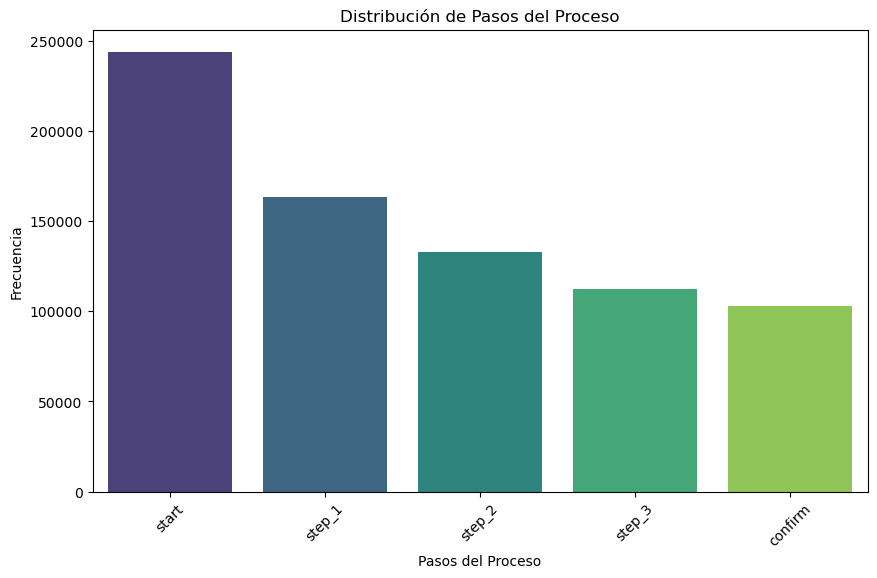

In [14]:
# Contar la frecuencia de cada 'process_step'
process_counts = df_web_combined['process_step'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=process_counts.index, y=process_counts.values, palette='viridis')
plt.title('Distribución de Pasos del Proceso')
plt.xlabel('Pasos del Proceso')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visibilidad
plt.show()

## 2. Análisis del Comportamiento del Cliente

Objetivo: Entender el perfil de los clientes que usan el proceso online.
Paso 1: ¿Quiénes son los clientes principales?

In [15]:
# Estadísticas descriptivas
df_demo.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.060900e+04,70595.000000,70595.000000,70594.000000,70595.000000,7.059500e+04,70595.000000,70595.000000
mean,5.004992e+06,12.052950,150.659367,46.442240,2.255528,1.474452e+05,3.382478,5.566740
std,2.877278e+06,6.871819,82.089854,15.591273,0.534997,3.015087e+05,2.236580,2.353286
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519329e+06,6.000000,82.000000,32.500000,2.000000,3.734683e+04,1.000000,4.000000
50%,5.016978e+06,11.000000,136.000000,47.000000,2.000000,6.333290e+04,3.000000,5.000000
75%,7.483085e+06,16.000000,192.000000,59.000000,2.000000,1.375449e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


**Edad de los clientes**

Visualizamos la distribución de la edad para entender si los clientes más jóvenes o mayores son los que más utilizan el servicio.

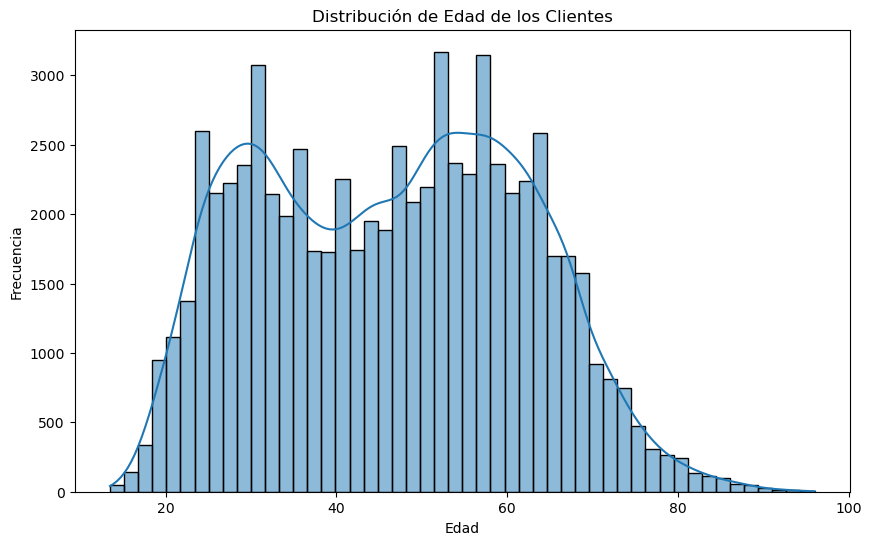

In [16]:
# Visualización de la distribución de edades
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_demo['clnt_age'], bins=50, kde=True)
plt.title('Distribución de Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

**Duración como clientes**

Compara clientes nuevos frente a los clientes con mayor antigüedad

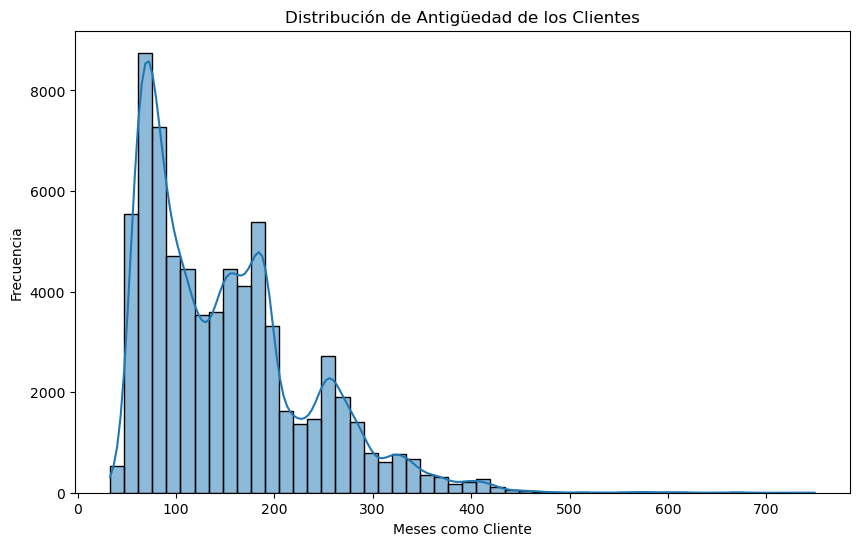

In [17]:
# Visualización de la distribución de tenencia
plt.figure(figsize=(10, 6))
sns.histplot(df_demo['clnt_tenure_mnth'], bins=50, kde=True)
plt.title('Distribución de Antigüedad de los Clientes')
plt.xlabel('Meses como Cliente')
plt.ylabel('Frecuencia')
plt.show()

**Distribución por género**

Exploramos la proporción de clientes según su género


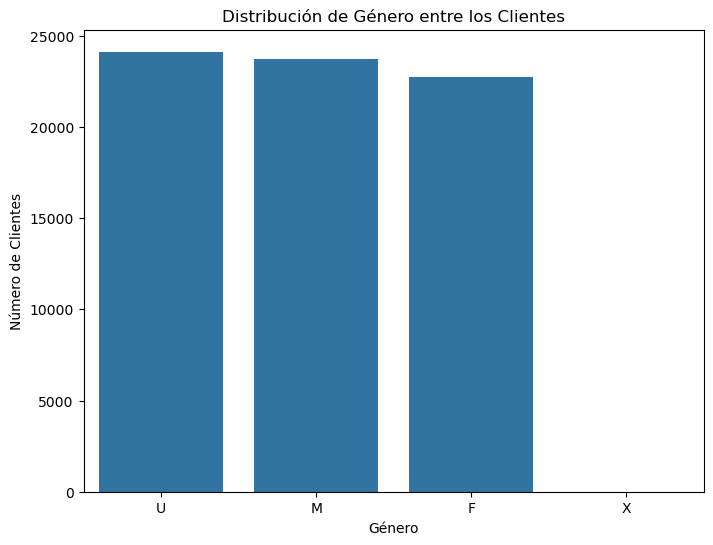

In [18]:
# Conteo de clientes por género
plt.figure(figsize=(8, 6))
sns.countplot(x='gendr', data=df_demo)
plt.title('Distribución de Género entre los Clientes')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')
plt.show()

**Análisis cruzado de edad y antigüedad**

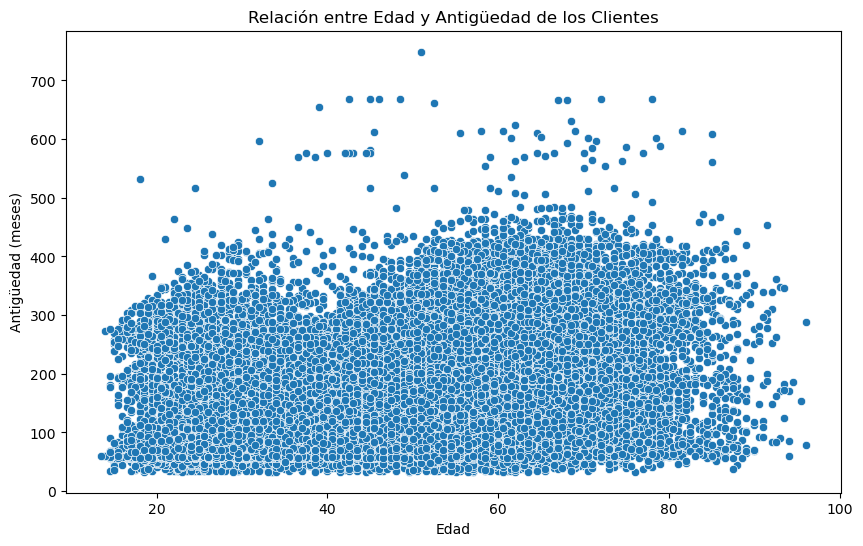

In [19]:
# Relación entre edad y tenencia
plt.figure(figsize=(10, 6))
sns.scatterplot(x='clnt_age', y='clnt_tenure_mnth', data=df_demo)
plt.title('Relación entre Edad y Antigüedad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Antigüedad (meses)')
plt.show()

¿Qué tan a menudo inician sesión los clientes?

¿Cuántas veces contactan al servicio de atención al cliente?

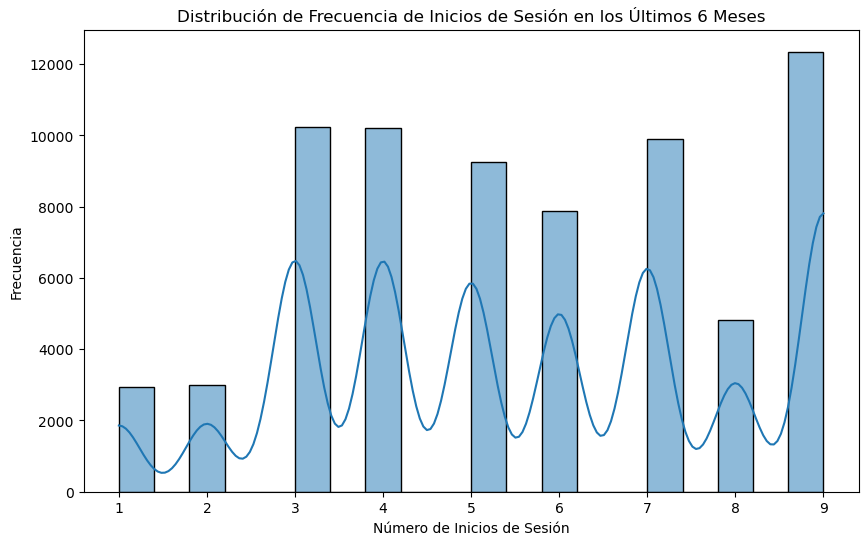

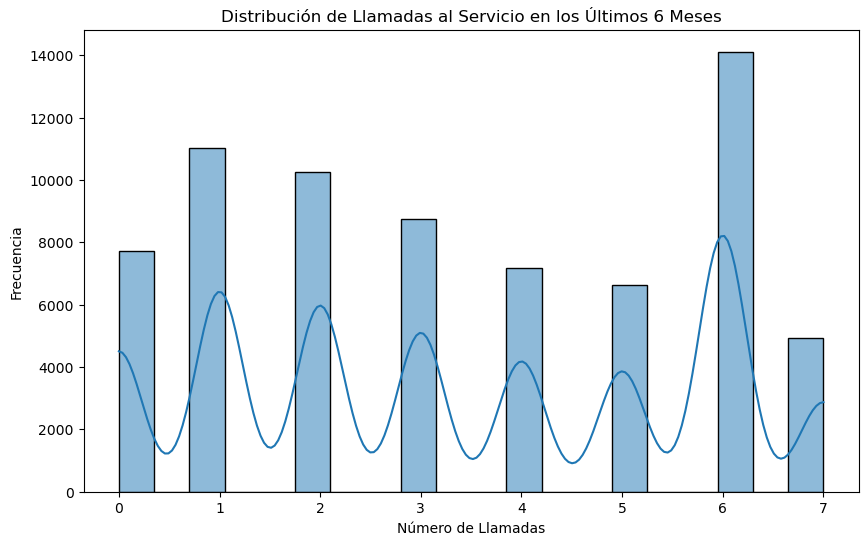

In [20]:
# Visualizar frecuencia de inicio de sesión
plt.figure(figsize=(10, 6))
sns.histplot(df_demo['logons_6_mnth'], bins=20, kde=True)
plt.title('Distribución de Frecuencia de Inicios de Sesión en los Últimos 6 Meses')
plt.xlabel('Número de Inicios de Sesión')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar frecuencia de llamadas al servicio de atención
plt.figure(figsize=(10, 6))
sns.histplot(df_demo['calls_6_mnth'], bins=20, kde=True)
plt.title('Distribución de Llamadas al Servicio en los Últimos 6 Meses')
plt.xlabel('Número de Llamadas')
plt.ylabel('Frecuencia')
plt.show()

## 3. Unir df_web_combined y df_experiment

df_merged contendrá todos los datos de df_web junto con las columnas de df_experiment que tienen un client_id coincidente.

In [21]:
df_web_combined['client_id'].nunique()

120157

In [31]:
df_demo['client_id'].nunique()

70609

In [22]:
df_experiment['client_id'].nunique()

50500

In [23]:
# Unir los DataFrames por 'client_id'
df_merged = pd.merge(df_web_combined, df_experiment, on='client_id', how='inner')

In [24]:
df_web_combined

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


Exploramos el nuevo df

In [25]:
df_exploration(df_merged)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321309 entries, 0 to 321308
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   client_id     321309 non-null  int64         
 1   visitor_id    321309 non-null  object        
 2   visit_id      321309 non-null  object        
 3   process_step  321309 non-null  object        
 4   date_time     321309 non-null  datetime64[ns]
 5   Variation     321309 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 17.2+ MB
None

Valores duplicados: 4074

Valores nulos: 
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
Variation       0
dtype: int64

Valores unicos: 
client_id        50500
visitor_id       56011
visit_id         69205
process_step         5
date_time       283344
Variation            2
dtype: int64


,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
321304,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
321305,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
321306,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
321307,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


In [26]:
df_merged['Variation'].value_counts()

Test       177847
Control    143462
Name: Variation, dtype: int64

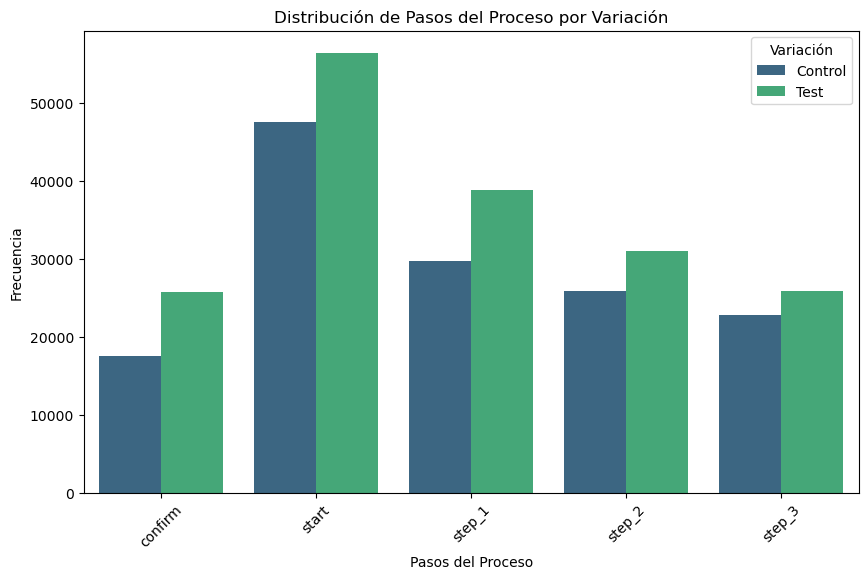

In [27]:
# Contar la frecuencia de cada 'process_step' y agregar la variación
process_counts = df_merged.groupby(['process_step', 'Variation']).size().reset_index(name='counts')

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=process_counts, x='process_step', y='counts', hue='Variation', palette='viridis')

plt.title('Distribución de Pasos del Proceso por Variación')
plt.xlabel('Pasos del Proceso')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visibilidad
plt.legend(title='Variación')  # Título para la leyenda
plt.show()